# Exploratory Data Analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import datetime
from motionchart.motionchart import MotionChart

In [2]:
births = pd.read_csv("data/Births.csv")
deaths = pd.read_csv("data/Deaths.csv")
tfr = pd.read_csv("data/TFR.csv")
nom = pd.read_csv("data/NOM.csv")
nim = pd.read_csv("data/NIM.csv")


In [3]:
births.describe()

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1996.500000,88389.950000,4484.325000,48401.35000,19121.250000,26067.425000,6531.075000,64413.150000,3532.125000
std,11.690452,6696.901737,492.742789,9446.64873,898.393859,4315.393804,472.825462,6104.084654,387.546403
min,1977.000000,77669.000000,3979.000000,34666.00000,17331.000000,20354.000000,5708.000000,57768.000000,2600.000000
25%,1986.750000,84088.000000,4142.250000,40700.00000,18402.000000,23680.750000,6089.250000,59911.750000,3366.500000
50%,1996.500000,87016.000000,4289.000000,47059.00000,19413.500000,24744.500000,6722.000000,61849.000000,3627.500000
75%,2006.250000,91471.250000,4587.250000,55148.25000,19844.750000,27520.250000,6925.500000,66770.000000,3794.000000
max,2016.000000,100355.000000,5703.000000,63959.00000,20496.000000,35875.000000,7232.000000,78953.000000,4039.000000


# A1. Investifating the Births, Deaths and TFR Data

### Plot of births recorded in each state/territory over different years

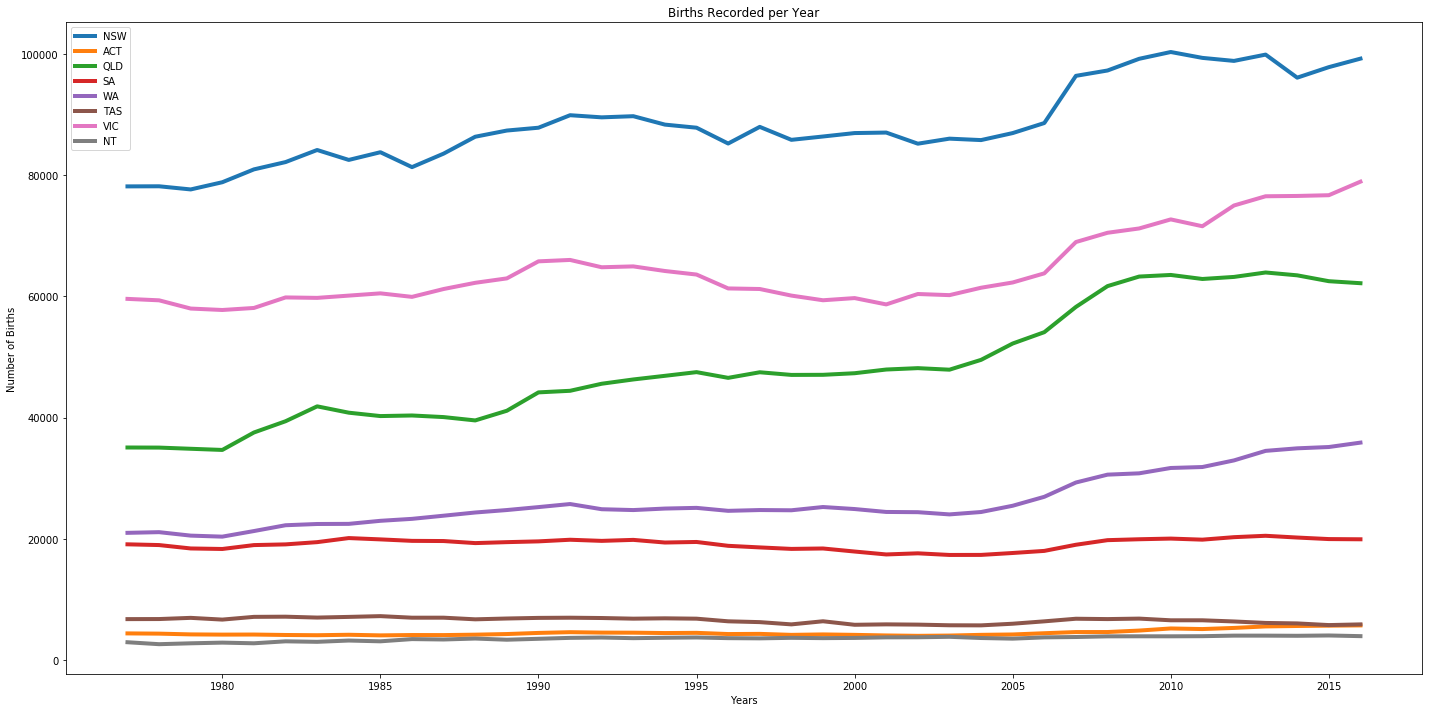

In [4]:

fig,ax = plt.subplots(figsize = (20,10))
ax.plot(births.Year,births.NSW,linewidth = 4)
ax.plot(births.Year,births.ACT,linewidth = 4)
ax.plot(births.Year,births.QLD,linewidth = 4)
ax.plot(births.Year,births.SA,linewidth = 4)
ax.plot(births.Year,births.WA,linewidth = 4)
ax.plot(births.Year,births.TAS,linewidth = 4)
ax.plot(births.Year,births.VIC,linewidth = 4)
ax.plot(births.Year,births.NT,linewidth = 4)
ax.legend(loc = "upper left")
ax.set_xlabel('Years')
ax.set_ylabel('Number of Births')
ax.set_title('Births Recorded per Year')
plt.tight_layout()
plt.show()



The graph above can help us understand the the trend of births in Australian states over a period of time.
We can have the following observations from the graph
- The states of NSW, VIC and QLD have higher number of births as compared to rest of the states
- The birth rate is constantly increasing for NSW, VIC and QLD while the rate is very gradually increasing for WA over the period of 4 decades
- The birth rate is almost constant for SA, TAS, Nt and ACT

###  1.a : Trend for Queensland and Tasmania
From the graph above we can observe that 
- Number of births for Queensland `(Green)` in mush higher than the number of births for Tasmania `(Brown)` for the entire period of time

- Secondly, though the birth rate for Tasmania is almost constant throughout, the rate of birth is consistently increased for Queensland with only a few years of drop during the mid 80's 

### 1.b : Graph for number of births in Astralian state for 2016

In [5]:
num_births = births[births.Year == 2016]
num_births = pd.melt(num_births, id_vars=['Year'],var_name='States',value_name = 'Births')
num_births.sort_values(by=['Births'],ascending = False,inplace =True)
states = list(births.columns)
states.remove('Year')


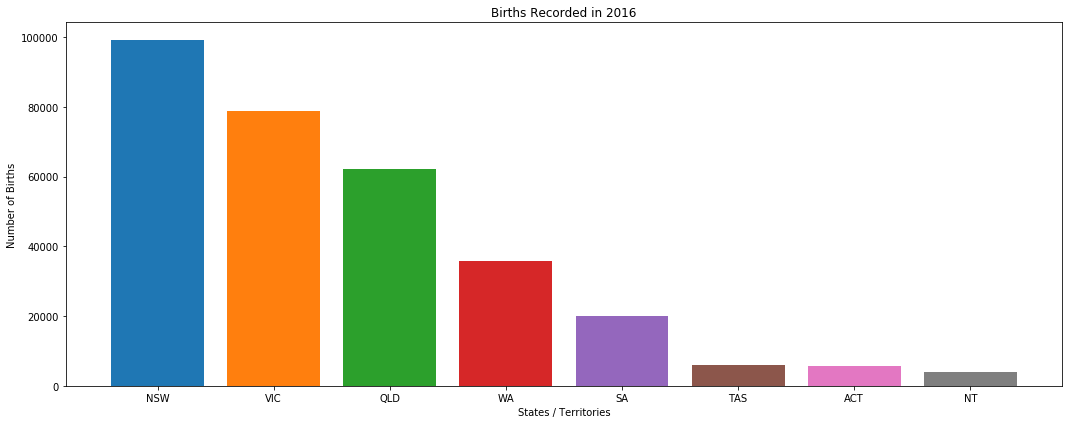

In [6]:
fig,ax = plt.subplots(figsize=(15,6))
ax.bar(num_births.States,num_births.Births,color = ["C0","C1","C2","C3","C4","C5","C6","C7"])
ax.set_xlabel('States / Territories')
ax.set_ylabel('Number of Births')
ax.set_title('Births Recorded in 2016')
plt.tight_layout()
plt.show()

##### From the bar chart above we can see that for the year `2016` the number of births recorded was hightest for `NSW` while it was the lowest for `NT`

## 2.a

In [7]:
new_births = pd.melt(births,id_vars = ['Year'],var_name = 'States',value_name = 'Births' )

In [8]:
agg_births = new_births.groupby("Year").sum()
agg_births = agg_births.reset_index()


In [9]:
slope, intercept, r_value, p_value, std_err = linregress(agg_births.Year,agg_births.Births)
prediction = [slope*each_year + intercept for each_year in agg_births.Year]

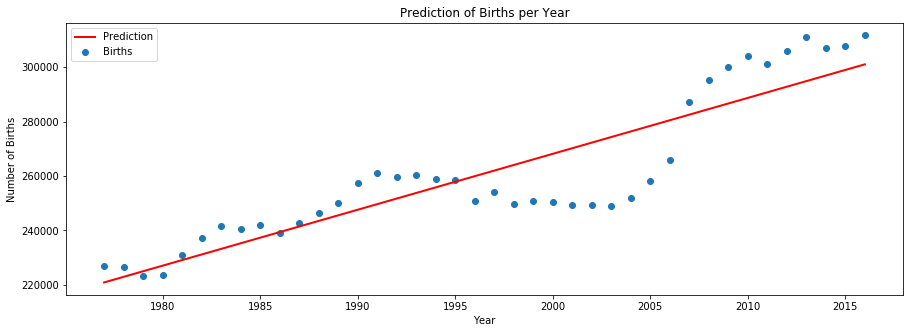

In [10]:
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(agg_births.Year,agg_births.Births,label = "Births")
ax.plot(agg_births.Year,prediction,color = 'r',label = "Prediction",linewidth = 2)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")
ax.legend(loc = "upper left")
ax.set_title("Prediction of Births per Year")
plt.show()

## 2.b
We can observe from the graph above that even though the regression line is able to capture the overall pattern in the graph i.e increase in number of births over time, still it is a **bad fit** to the data in hand because it fails to capture change in trend for shot period of time. 
This can be seen for periods such as 
- in between `1985` and `1990`, where the pattern in not linear and also 
- in the case odf period in between `1990` and `2005` where the pattern is even though linear in nature but not increasing.

## 2.c

In [11]:
births_2050 = ( slope * 2050 ) + intercept 
births_2100 = ( slope * 2100 ) + intercept 
print("Predicted number of Births in 2050 :",int(births_2050))
print("Predicted number of Births in 2100 :",int(births_2100))


Predicted number of Births in 2050 : 370945
Predicted number of Births in 2100 : 473754


## 2.d

In [12]:
birth_gt_2010 = agg_births[births.Year >= 2010]
slope, intercept, r_value, p_value, std_err = linregress(birth_gt_2010.Year,birth_gt_2010.Births)
prediction = [slope*each_year + intercept for each_year in birth_gt_2010.Year]

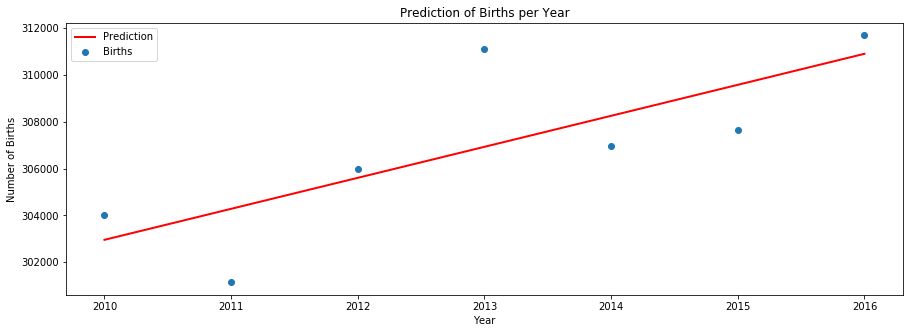

In [13]:
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(birth_gt_2010.Year,birth_gt_2010.Births,label = "Births")
ax.plot(birth_gt_2010.Year,prediction,color = 'r',label = "Prediction",linewidth = 2)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")
ax.legend(loc = "upper left")
ax.set_title("Prediction of Births per Year")
plt.show()

From the graph above we can observe that the prediction line captures the overall pattern really well. Eventhough is does not capture the trend for each year still it is a **good fit** for the data because making a line passing through all the training points would make the model `overfitted`. Also we can see that the points are distributed almost equally on either sides of the line, making the model a better fit for prediction task.

Even though the model above fits well to the data it is still very optimistic to say that the model would fit well for prediction of **all** future population because
- it captures the trend for a very short period of time i.e 7 data points, so it is expected to do well for predicting future population for the years that follow immediately after 2016 but may fail for years that are far away from 2016 because of underfitting problem.


## 2.e

In [14]:
coeff = np.polyfit(agg_births.Year,agg_births.Births,3)
fit = np.poly1d(coeff)
line_poly = [fit(each_year) for each_year in agg_births.Year]

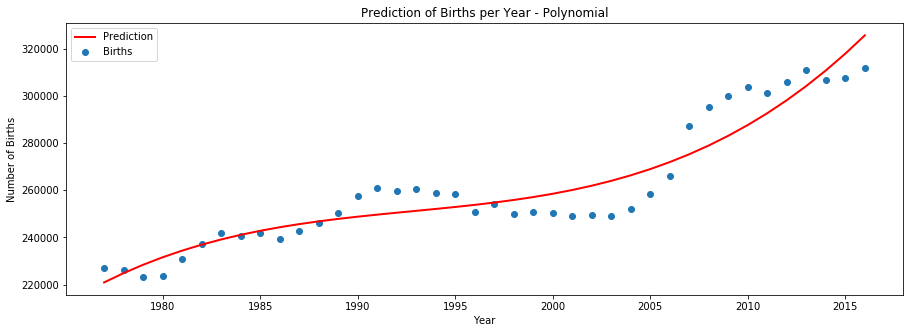

In [15]:
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(agg_births.Year,agg_births.Births,label = "Births")
ax.plot(agg_births.Year,line_poly,color = 'r',label = "Prediction",linewidth = 2)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Births")
ax.legend(loc = "upper left")
ax.set_title("Prediction of Births per Year - Polynomial")
plt.show()

### e.i

The model used for prediction is polynomial in nature i.e the features used are polynomial function of the orginal feature i.e `Births`. Here the degree of the polynomial chosen is 3. 
- Even though a polynomial of a higher degree could produce a better fit for the data but would fail to genralise the trend leading to `overfitting`
- This model is better for prediction task as it also captures the trends for different periods i.e it increses for the period between `1976` and `1990`, then it flatens between the years `1990` and `2000` and then again rises sharply  post year `2000`

### e.ii

In [16]:
births_2050 = fit(2050) 
births_2100 = fit(2100)
print("Predicted number of Births in 2050 :",int(births_2050))
print("Predicted number of Births in 2100 :",int(births_2100))


Predicted number of Births in 2050 : 1137796
Predicted number of Births in 2100 : 5872321


# 3

In [17]:
tfr.describe()

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
count,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1993.000000,1.963000,1.86040,2.020489,1.834267,1.969156,2.046644,2.398067,1.837711
std,13.133926,0.207305,0.24505,0.267880,0.186805,0.238893,0.219245,0.409029,0.298563
min,1971.000000,1.723000,1.62500,1.800000,1.688000,1.699000,1.794000,2.009000,1.509000
25%,1982.000000,1.850000,1.73200,1.849000,1.727000,1.860000,1.903000,2.163000,1.677000
50%,1993.000000,1.925000,1.79100,1.931000,1.764000,1.916000,1.997000,2.264000,1.745000
75%,2004.000000,1.978000,1.86300,2.085000,1.866000,1.982000,2.079000,2.368000,1.877000
max,2015.000000,2.806000,2.85800,3.025000,2.629000,3.047000,2.903000,4.029000,2.908000


## 3.a

In [18]:
min_tfr = tfr[tfr.QLD == min(tfr.QLD)]

In [19]:
min_tfr_QLD = min_tfr.QLD.values[0]
min_tfr_yr = min_tfr.Year.values[0]
min_tfr_NT = min_tfr.NT.values[0]

print("Minimum TFR value for Queendsland is :",min_tfr_QLD)
print("It occured in the year :",min_tfr_yr)
print("TFR value for Nothern Territory during the year",min_tfr_yr,"was :",min_tfr_NT)

Minimum TFR value for Queendsland is : 1.8
It occured in the year : 1999
TFR value for Nothern Territory during the year 1999 was : 2.123


## 4.a

In [20]:
new_deaths = pd.melt(deaths,id_vars = ['Year'],var_name = 'States',value_name = 'Deaths' )
agg_deaths = new_deaths.groupby("Year").sum()
agg_deaths = agg_deaths.reset_index()

In [21]:
natural_growth = agg_births.Births - agg_deaths.Deaths

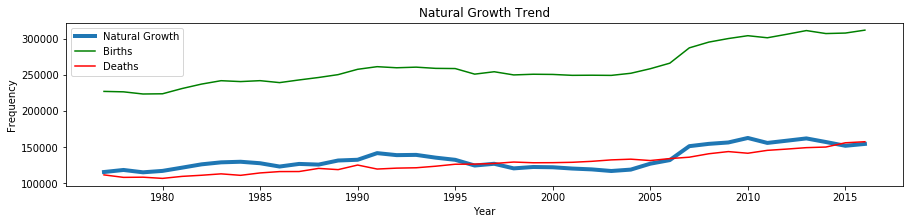

In [22]:
fig,ax = plt.subplots(figsize = (15,3))
ax.plot(agg_births.Year,natural_growth,label = "Natural Growth",linewidth = 4)
ax.plot(agg_births.Year,agg_births.Births,label = "Births",color = "g")
ax.plot(agg_deaths.Year,agg_deaths.Deaths,label = "Deaths",color = "r")
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.legend(loc = "upper left")
ax.set_title("Natural Growth Trend")
plt.show()

- One interesting thing we can observe in the graph is that the **Natural Growth** follows the pattern very similar to the `Number of Births` per year

In [23]:
slope, intercept, r_value, p_value, std_err = linregress(agg_births.Year,natural_growth)
prediction = [slope*each_year + intercept for each_year in agg_births.Year]

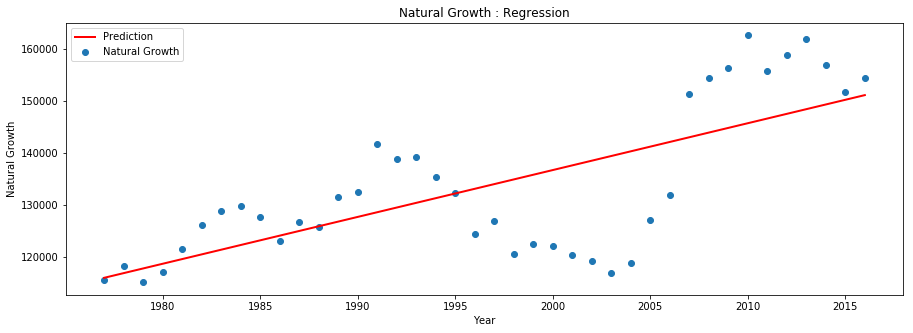

In [24]:
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(agg_births.Year,natural_growth,label = "Natural Growth")
ax.plot(agg_births.Year,prediction,color = 'r',label = "Prediction",linewidth = 2)
ax.set_xlabel("Year")
ax.set_ylabel("Natural Growth")
ax.legend(loc = "upper left")
ax.set_title("Natural Growth : Regression")
plt.show()

The graph above help us understand the overall trend for Natural growth over a period of 40 years. We can observe that
- The `Natural Growth` is increasing over the period of 4 decades
- Natural growth decreases sharply between the years `1990` and `2004`. This can be due to decres in overall `number of births` during the same period of time acroos Australia which can be verified from the `Natural Growth Trend` graph. 


# A2. Investigating the Migration Data(NOM and NIM) 

In [25]:
nom.describe()

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1996.500000,46061.225000,33935.325000,20556.65000,6492.150000,17427.125000,829.575000,1072.525000,1087.675000
std,11.690452,18461.454485,18813.387739,14281.39044,4383.685498,11623.444664,575.573956,831.492911,1238.235519
min,1977.000000,12628.000000,7965.000000,3267.00000,541.000000,3698.000000,36.000000,44.000000,-603.000000
25%,1986.750000,31702.000000,20037.000000,9677.25000,3053.750000,10580.750000,376.000000,555.250000,228.500000
50%,1996.500000,42388.500000,26879.500000,17539.50000,4851.500000,14032.000000,758.000000,974.000000,686.500000
75%,2006.250000,57574.250000,40828.500000,27145.75000,9329.250000,19273.750000,1191.500000,1188.500000,1652.500000
max,2016.000000,87389.000000,83616.000000,59319.00000,18005.000000,50780.000000,2127.000000,4354.000000,4019.000000


## 1.a

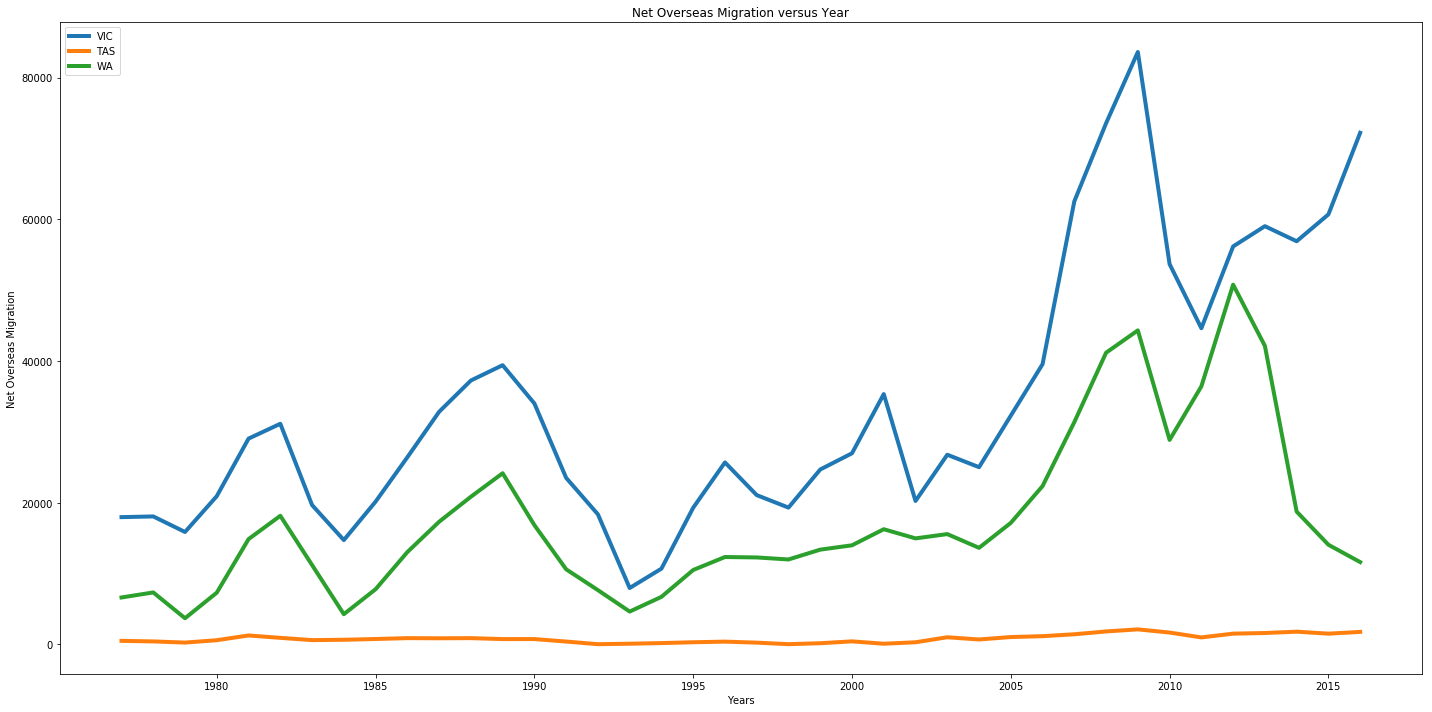

In [26]:
fig,ax = plt.subplots(figsize = (20,10))
ax.plot(nom.Year,nom.VIC,linewidth = 4)
ax.plot(nom.Year,nom.TAS,linewidth = 4)
ax.plot(nom.Year,nom.WA,linewidth = 4)
ax.legend(loc = "upper left")
ax.set_xlabel('Years')
ax.set_ylabel('Net Overseas Migration')
ax.set_title('Net Overseas Migration versus Year')
plt.tight_layout()
plt.show()


The graph above gives us insight about the `Net Overseas Migration` for 3 states in Australia. We can observe that :
- The NOM follows a similar patter for Victoria and Western Australia. Though the line is wiggly but has been growing steadily over the period of 40 yers
- Secondly we can observe that the number of Overseas Migration is almost constant for Tasmania and is very low as compared to other two states

## 1.b 

In [27]:
new_nom = pd.melt(nom,id_vars = ['Year'],var_name = 'States',value_name = 'NOM' )
agg_nom = new_nom.groupby("Year").sum()
agg_nom = agg_nom.reset_index()

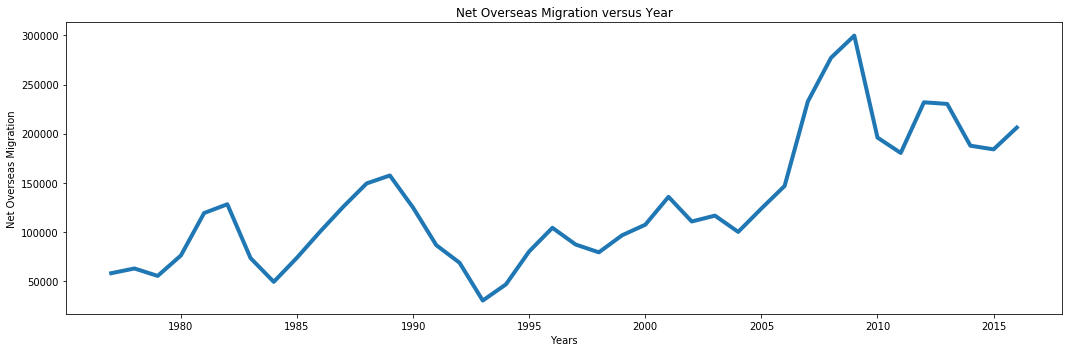

In [28]:
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(agg_nom.Year,agg_nom.NOM,linewidth =4)
ax.set_xlabel('Years')
ax.set_ylabel('Net Overseas Migration')
ax.set_title('Net Overseas Migration versus Year')
plt.tight_layout()
plt.show()

From the plot above we can see the `Net Overseas Migration` for Australia over 4 decades. The graph gives us the following insight :
- The *Net Overseas Migration* for Australia is increasing steadily on an average over a period of 40 years
- The *NOM* took a huge dip between late `1980s` and early `1990s`
- Lastly, the *NOM* incresed steadily again between `1993` and `2005` after which it skyrocketed in the following years

## 2.a

In [29]:
new_nim = pd.melt(nim,id_vars = ['Year'],var_name = 'States',value_name = 'NIM' )

In [30]:
nom_nim = pd.merge(new_nim, new_nom)
first_year = nom_nim.at[0,"Year"]
last_year = nom_nim.at[len(nom_nim)-1,"Year"]
print("First Year is :",first_year)
print("Last Year is :",last_year)

First Year is : 1977
Last Year is : 2016


## 2.b

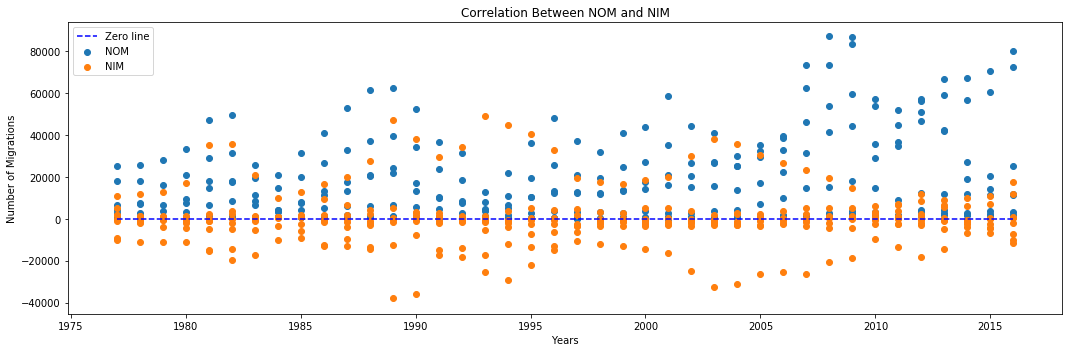

In [31]:
zero_line = [0] * len(nom_nim)
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(nom_nim.Year,nom_nim.NOM,label = "NOM" )
ax.scatter(nom_nim.Year,nom_nim.NIM,label = "NIM")
ax.plot(nom_nim.Year,zero_line,'b',linestyle='dashed',label = "Zero line")
ax.legend(loc = "upper left")
ax.set_xlabel('Years')
ax.set_ylabel('Number of Migrations')
ax.set_title('Correlation Between NOM and NIM')
plt.tight_layout()
plt.show()

The graph above help us understand 2 thing :
- The NOM value is always greater than zero
- The NIM value is kind of distributed equally on both sides of the zero line

Let is explore the information even further to get some insights

In [32]:
agg_nom_nim = nom_nim.groupby("Year").sum()
agg_nom_nim = agg_nom_nim.reset_index()

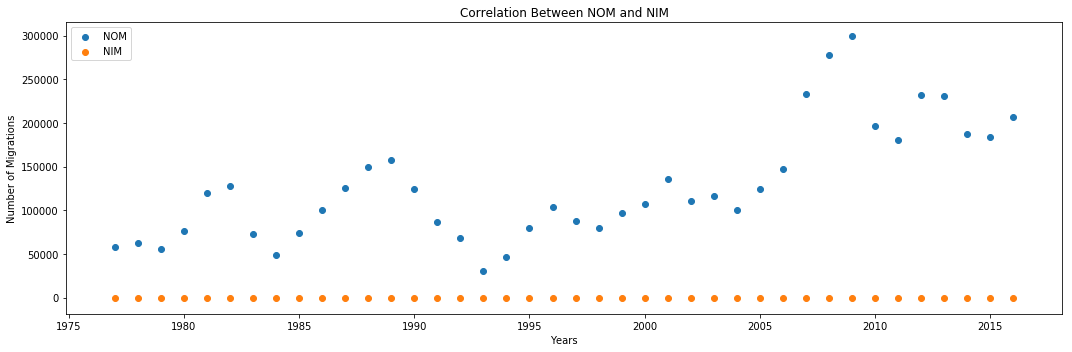

In [33]:
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(agg_nom_nim.Year,agg_nom_nim.NOM,label = "NOM")
ax.scatter(agg_nom_nim.Year,agg_nom_nim.NIM,label = "NIM")
ax.legend(loc = "upper left")
ax.set_xlabel('Years')
ax.set_ylabel('Number of Migrations')
ax.set_title('Correlation Between NOM and NIM')
plt.tight_layout()
plt.show()

From the graph above we can observe that :

- The NIM value is close to zero throughout the time frame. This implies there was very little or no inter state migration in Astralia
- Secondly the Net oversea migration has been increasing with time. Though it is not consistent in nature, but on an average the pattern suggest that the NOM has been grawing steadily over time

## 2.c

In [34]:
nom_nim_vic = nom_nim[nom_nim["States"] == "VIC"]

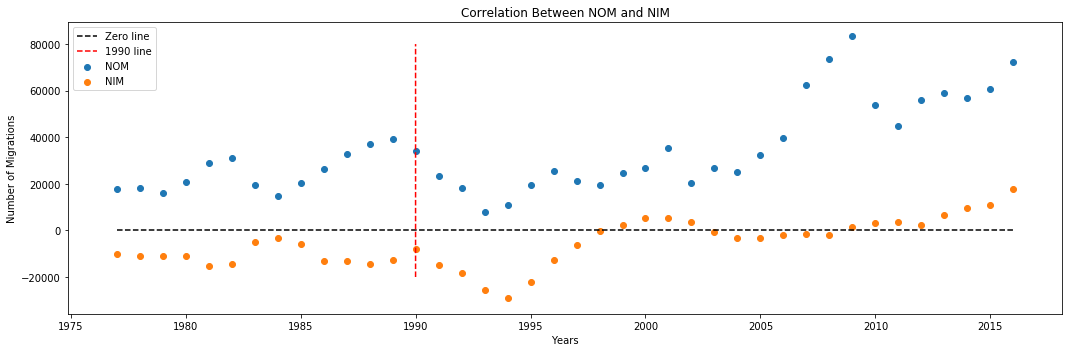

In [35]:
x_1990 = [1990]*100000
y_1990 = range(-20000,80000)
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(nom_nim_vic.Year,nom_nim_vic.NOM,label = "NOM")
ax.scatter(nom_nim_vic.Year,nom_nim_vic.NIM,label = "NIM")
ax.plot(nom_nim.Year,zero_line,'black',linestyle='dashed',label = "Zero line")
ax.plot(x_1990,y_1990,'r',linestyle='dashed',label = "1990 line")


ax.legend(loc = "upper left")
ax.set_xlabel('Years')
ax.set_ylabel('Number of Migrations')
ax.set_title('Correlation Between NOM and NIM')
plt.tight_layout()
plt.show()

From the graph above we can observe that the graph is divided into 2 part:
- The left hand side of the graph showcases the NOM adn NIM value before 1990. We can see that the pattern of NOM is **inverse** of NIM. This implies when the NOM increased by some certain value, the NIM during the period decreased by some amount and vice-verse 
- The region on the right hand side portray a different pattern for the rest of the graph. We can observe that as the NOM value increases, the NIM value also increase. Though the amount of increase varies, but the general pattern remains the same  

## 2.d 

In [36]:
agg_nim = new_nim.groupby("Year").sum()
agg_nim = agg_nim.reset_index()

In [37]:
nim_QLD = new_nim[new_nim["States"] == "QLD"] 
nim_NSW = new_nim[new_nim["States"] == "NSW"]


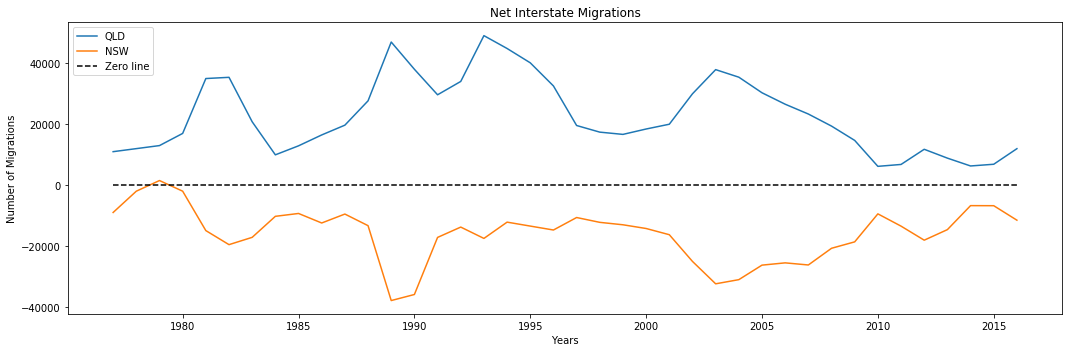

In [38]:
zero_line = [0] * len(nim_NSW)
fig,ax = plt.subplots(figsize = (15,5))
ax.plot(nim_QLD.Year,nim_QLD.NIM,label = "QLD" )
ax.plot(nim_NSW.Year,nim_NSW.NIM,label = "NSW")
ax.plot(nim_NSW.Year,zero_line,'black',linestyle='dashed',label = "Zero line")
ax.legend(loc = "upper left")
ax.set_xlabel('Years')
ax.set_ylabel('Number of Migrations')
ax.set_title('Net Interstate Migrations')
plt.tight_layout()
plt.show()

- From the graph above we can observe that the NIM for `New South Wales` and `Queensland` follow an **inverse** relationship. When the NIM for Queensland increses, the NIM for New South Wales decreses adn vice versa. The pattern is consistent throughout the timeframe suggesting a strong relationship between them.

- One important thing to note here is that not only does the pattern is consistent but also the amount by which the NIM varies for every single year is also almost same, i.e for instance an almost -40,000 NIM in 1989 for NSW corresponds to almost +40,000 NIM in the same year for QLD.

# A3. Visualising the Relationship over Time

In [39]:
merged_df = pd.merge(nom_nim,new_deaths)
merged_df = pd.merge(merged_df,new_births)
merged_df["Natural Growth"] = merged_df["Births"] - merged_df["Deaths"]

## 1.

In [40]:
from motionchart.motionchart import MotionChart
mChart = MotionChart(df = merged_df, key='Year', x='NOM', y='NIM', xscale='linear', yscale='linear',
                     size='Natural Growth', color='States', category='States')

mChart.to_notebook()

## 2.a
As NOM increses the absolute value of NIM seems to increase, that is when the value of NOM rises the value of NIM changes by some value in positive or negative direction indicating a relationship between them. Although this relationship can be seen predominantly only in 4 of the 8 states/territories.

## 2.b 
The NOM for VIC was higher than NSW for `2006`. This can be verified using the inmage below 

<img src="VIC_NOM.png" width="760">

## 2.c
`Queensland` has the highest NIM most of the years which can be observed from the peach colour bubble in the motion graph  

# Task B : Exploratory Analysis of Data 

In [41]:
crime_df = pd.read_csv("data/Crime_Statistics_SA_2014_2019.csv")

## B1. Daily number of crimes
### 1.

In [42]:
crime_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
0,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0
1,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0
2,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0
3,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0
4,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0


In [43]:
crime_df["Date Suburb"] = crime_df["Reported Date"] +":"+ crime_df["Suburb - Incident"]

In [44]:
fun = { "Offence Count":{"Sum Offence":"sum"}}
crime_gt_15 = crime_df.groupby("Date Suburb").agg(fun)

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [45]:
crime_gt_15 = crime_gt_15.reset_index()
crime_gt_15.columns = crime_gt_15.columns.droplevel(0)
crime_gt_15.rename(columns = {'':'Date Suburb'},inplace = True) # rename the first column to be 'class'


In [46]:
crime_gt_15 = crime_gt_15[crime_gt_15["Sum Offence"]>=15]

In [47]:
crime_gt_15["Date"] = crime_gt_15["Date Suburb"].map(lambda x: x.split(":")[0])
crime_gt_15["Suburb"] = crime_gt_15["Date Suburb"].map(lambda x: x.split(":")[1])


In [48]:
crime_gt_15 = crime_gt_15.drop("Date Suburb",1)

In [49]:
count_days = {"Suburb":{"Number of Days":"count"}}
num_days = crime_gt_15.groupby("Suburb").agg(count_days)

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [50]:
num_days = num_days.reset_index()
num_days.columns = num_days.columns.droplevel(0)
num_days.rename(columns = {'':'Suburb'},inplace = True) # rename the first column to be 'class'


In [51]:
num_days

,Suburb,Number of Days
0,ADELAIDE,877
1,ASCOT PARK,1
2,DAVOREN PARK,1
3,FINDON,1
4,GLENELG,1
5,LOXTON,1
6,MARLESTON,1
7,MODBURY,1
8,MORPHETT VALE,3
9,MOUNT BARKER,1


## 2.

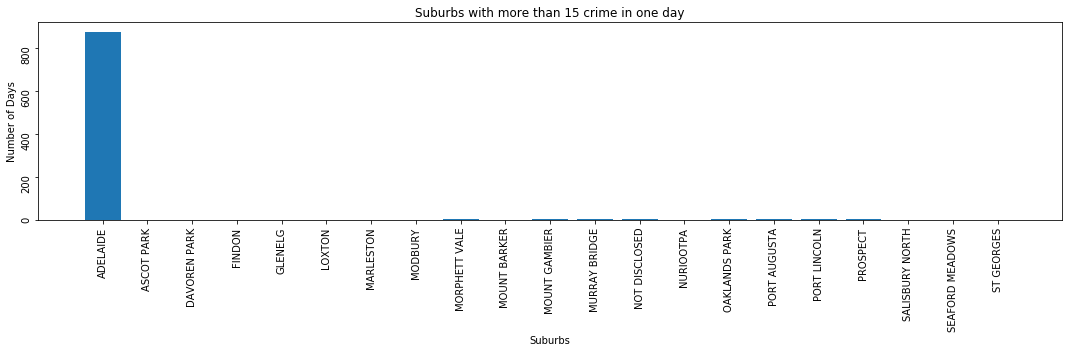

In [52]:
fig,ax = plt.subplots(figsize = (15,5))
ax.bar(num_days.Suburb,num_days["Number of Days"])
ax.set_xlabel('Suburbs')
ax.set_ylabel('Number of Days')
ax.set_title('Suburbs with more than 15 crime in one day')
ax.tick_params(labelrotation=90)

plt.tight_layout()
plt.show()


## 3.

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


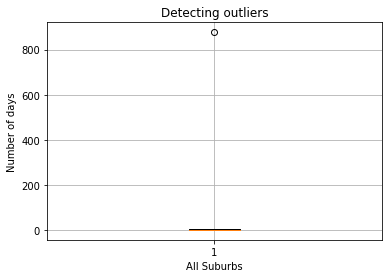

In [53]:
plt.boxplot(num_days['Number of Days'])
plt.title("Detecting outliers")
plt.ylabel("Number of days")
plt.xlabel("All Suburbs")
axes = plt.axes()
axes.grid()
plt.show()

From the boxplot above we see that 1 entry with a value greater than 800 days is dominating the entire data and hence skews the data towards itself. Since its a outlier, it is better to remove it before carrying forward the analysis any further

In [54]:
num_days = num_days[num_days["Number of Days"]<800]

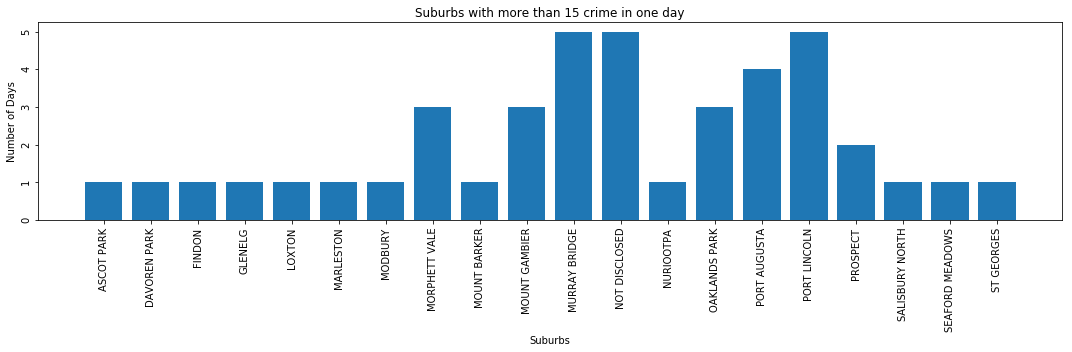

In [55]:
fig,ax = plt.subplots(figsize = (15,5))
ax.bar(num_days.Suburb,num_days["Number of Days"])
ax.set_xlabel('Suburbs')
ax.set_ylabel('Number of Days')
ax.set_title('Suburbs with more than 15 crime in one day')
ax.tick_params(labelrotation=90)

plt.tight_layout()
plt.show()

## 4.
We can observe from the graphs above that the second graph is much easier to interpret than the graph with an outlier. This is because the outliers value was so high as compared to rest of the suburbs that it skewed the graph towards itself. Since the difference between the number of days for the outlier suburb and the rest of the suburbs was significantly high, we could only see one bar and rest of the bars were pushed down to zero which is not the case when the suburb with extreme value is removed as now the value for all the suburbs are comparable.

## B2. Challenge : Identify mistakes in data entry

In [56]:
crime_df= pd.read_csv("data/Crime_Statistics_SA_2014_2019.csv")

In [57]:
crime_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
0,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,4.0
1,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,8.0
2,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Assault Police,2.0
3,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,2.0
4,2014-01-01,ADELAIDE,5000,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,4.0


In [58]:
len(crime_df)

385296

## 1.

checking for errors in `Reported Date`

In [59]:
def check_date(date):
    year = date.split("-")[0]
    month = date.split("-")[1]
    day = date.split("-")[2]
    error = 0
    try : 
        datetime.datetime(int(year),int(month),int(day))
    except ValueError :
        error = 1
    return error

In [60]:
crime_df["Error"] = crime_df["Reported Date"].map(lambda x: check_date(x))
crime_df.Error.unique()

array([0])

NO error found in `dates`

In [61]:
unq_sub = crime_df["Suburb - Incident"].dropna().unique()
unq_post = crime_df["Postcode - Incident"].dropna().unique()

In [62]:
print("Number of unique suburbs :",len(unq_sub))
print("Number of unique postcodes :",len(unq_post))

Number of unique suburbs : 1627
Number of unique postcodes : 694


We can see that number of suburbs are not equal to number of postcodes. This implies some errors in either one of them.


In [63]:
post = crime_df[crime_df["Suburb - Incident"]=="ADELAIDE"]
post.groupby("Postcode - Incident").count()

,Reported Date,Suburb - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count,Error
Postcode - Incident,,,,,,,
5000,9793,9793,9793,9793,9793,9793,9793
5000.0,1843,1843,1843,1843,1843,1843,1843
5001,5,5,5,5,5,5,5
5001.0,1,1,1,1,1,1,1


## 2. 
Correcting postcodes

In [64]:
for each_sub in unq_sub:
    if each_sub not in ["NOT DISCLOSED","NO FIXED PLACE OF ABODE","ADDRESS UNKNOWN"]:
        post = crime_df[crime_df["Suburb - Incident"]==each_sub]
        post_codes = post.groupby("Postcode - Incident").count().reset_index()
        if len(post_codes) > 0 :
            actual_post_code = post_codes[post_codes["Reported Date"] == post_codes["Reported Date"].max()]["Postcode - Incident"].values[0]
            crime_df.at[crime_df[crime_df["Suburb - Incident"] == each_sub].index, "Postcode - Incident"] = actual_post_code

            

In [65]:
crime_df = crime_df[crime_df["Suburb - Incident"] != "NOT DISCLOSED"]
crime_df = crime_df[crime_df["Suburb - Incident"] != "ADDRESS UNKNOWN"]
crime_df = crime_df[crime_df["Suburb - Incident"].notna()]

In [66]:
len(crime_df)

378596

In [67]:
385296 - 378596

6700

In [68]:
6700/378596

0.017696964574374797

## 3.

After rectifying the errors, we can see that 6700 rows were removed due to lack of information for analysis purpose as they were contributing to the offence count even though their suburb was not known. Although the dataset that we now have is cleaner, still it would not change the graph results in B1 by any significant amount if the data is missing at random because the missing data account to only 1.8 percent of the total data.

# Task C

The data is life expectancy data for last 15 years across the world. I wish to analyse pattern in life expectancy for different countries having different status and feactors. I also wish to analyse the factors that affect thelife expectancy the most.  

Data Source : https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [69]:
life_df = pd.read_csv("Life Expectancy Data.csv")

In [70]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [71]:
len(life_df)

2938

In [72]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [73]:
life_df = life_df[life_df["Life expectancy "].notna()]

We start by dividing the group in two groups, `Developing` and `developed`

In [74]:
developed_df = life_df[life_df.Status == "Developed"]
developing_df = life_df[life_df.Status == "Developing"]

In [75]:
print("Number of developed countries : ",len(developed_df.Country.unique()))
print("Number of developing countries : ",len(developing_df.Country.unique()))

Number of developed countries :  32
Number of developing countries :  151


In [76]:
func = {"Life expectancy ":{"Avg LE":"mean"}}
new_developed = developed_df.groupby("Year").agg(func)
new_developing = developing_df.groupby("Year").agg(func)


/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [77]:
new_developed = new_developed.reset_index()
new_developed.columns = new_developed.columns.droplevel(0)
new_developed.rename(columns = {'':'Year'},inplace = True)

new_developing = new_developing.reset_index()
new_developing.columns = new_developing.columns.droplevel(0)
new_developing.rename(columns = {'':'Year'},inplace = True)

In [78]:
new_developed.head()

,Year,Avg LE
0,2000,76.803125
1,2001,77.128125
2,2002,77.546875
3,2003,77.940625
4,2004,78.384375


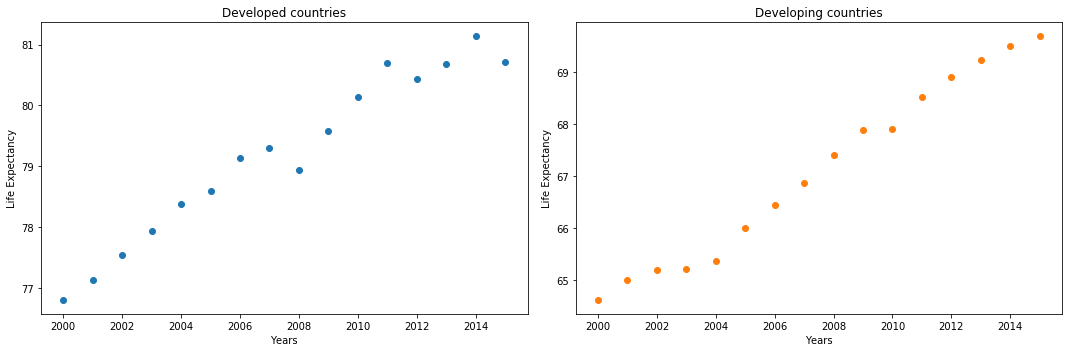

In [79]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
ax1.scatter(new_developed.Year,new_developed["Avg LE"])
ax1.set_xlabel('Years')
ax1.set_ylabel('Life Expectancy')
ax1.set_title('Developed countries')

ax2.scatter(new_developing.Year,new_developing["Avg LE"],color = "C1")
ax2.set_xlabel('Years')
ax2.set_ylabel('Life Expectancy')
ax2.set_title('Developing countries')

plt.tight_layout()
plt.show()

- From the graph above we can observe that the life expectancy for developed and developing countries is growing linearly with respect to the time. Now we can merge the two graphs above and get a better insight of the rate with the he life expectancy is growing in both the categories.

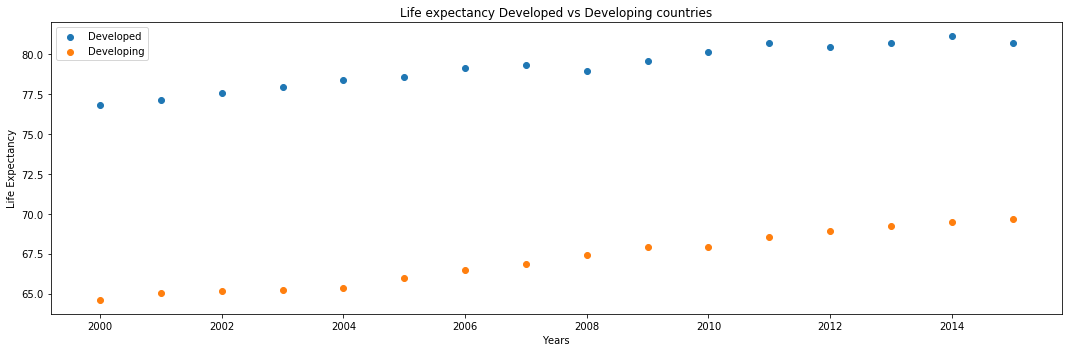

In [80]:
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(new_developed.Year,new_developed["Avg LE"],label = "Developed")
ax.scatter(new_developing.Year,new_developing["Avg LE"],label = "Developing")
ax.legend(loc = "upper left" )
ax.set_xlabel('Years')
ax.set_ylabel('Life Expectancy')
ax.set_title('Life expectancy Developed vs Developing countries')

plt.tight_layout()
plt.show()

- From the graph above we can infer that life expectancy is growing at the same rate for both type of the countries which is good. Another thing to notice out here is that life expectancy for developed countries is about 10 years higher for the entire time frame.

###### Prediction task 

We can try to predict the life expectancy in each category of country to check for the difference in it at a point of time in future

In [81]:
slope_d, intercept_d, r_value, p_value, std_err = linregress(new_developed.Year,new_developed["Avg LE"])
prediction_developed = [slope_d*each_year + intercept_d for each_year in new_developed.Year]

slope, intercept, r_value, p_value, std_err = linregress(new_developing.Year,new_developing["Avg LE"])
prediction_developing = [slope*each_year + intercept for each_year in new_developing.Year]

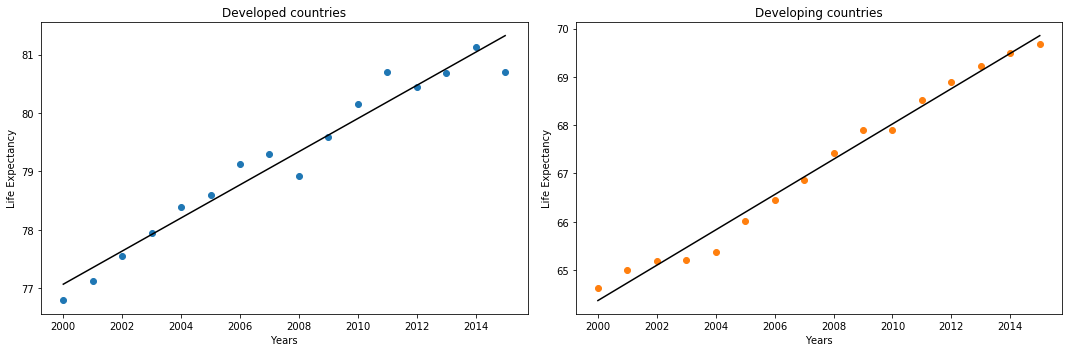

In [82]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
ax1.scatter(new_developed.Year,new_developed["Avg LE"])
ax1.plot(new_developed.Year,prediction_developed,color = "black")
ax1.set_xlabel('Years')
ax1.set_ylabel('Life Expectancy')
ax1.set_title('Developed countries')

ax2.scatter(new_developing.Year,new_developing["Avg LE"],color = "C1")
ax2.plot(new_developed.Year,prediction_developing,color = "black")
ax2.set_xlabel('Years')
ax2.set_ylabel('Life Expectancy')
ax2.set_title('Developing countries')

plt.tight_layout()
plt.show()

Now based on the prediction line lets predict the life expectancy 100 years from now and also find the difference in between them

In [83]:
le_developed = slope_d*(2019+140) + intercept_d
le_developing = slope*(2019+140) + intercept
print("Life Expectancy in Developed countries in 2119 :",le_developed)
print("Life Expectancy in Developing countries in 2119 :",le_developing)

Life Expectancy in Developed countries in 2119 : 122.14072150735285
Life Expectancy in Developing countries in 2119 : 122.49911569925962


Now here is an **interesting factor**
- If the growth of life expectancy continues at the **same rate** then the developing countries may outperform developed countries in almost 140 years (Although this notion is theoritical as the life expectancy here is just a function of time which is the case in practical. Also, humans may not be able to live 122 yaers on a average anytime soon,however cyborbs may.)

In [84]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [85]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [86]:
mChart = MotionChart(df = life_df, key='Year', x='Life expectancy ', y='Adult Mortality', xscale='linear', yscale='linear',
                     size='GDP', color='Country',category = "Country")

mChart.to_notebook()

The motion chart above help us understand 2 thing 
- The life expectancy and adult mortality have a negative correlation 
- The life expactancy was higher for countries with higher GDP(size of the bubble).